## Time Series Modeling

#Step 1: Time Series Decomposition
Decompose your imputed_Quantity time series to analyze its components: trend, seasonality, and residuals.

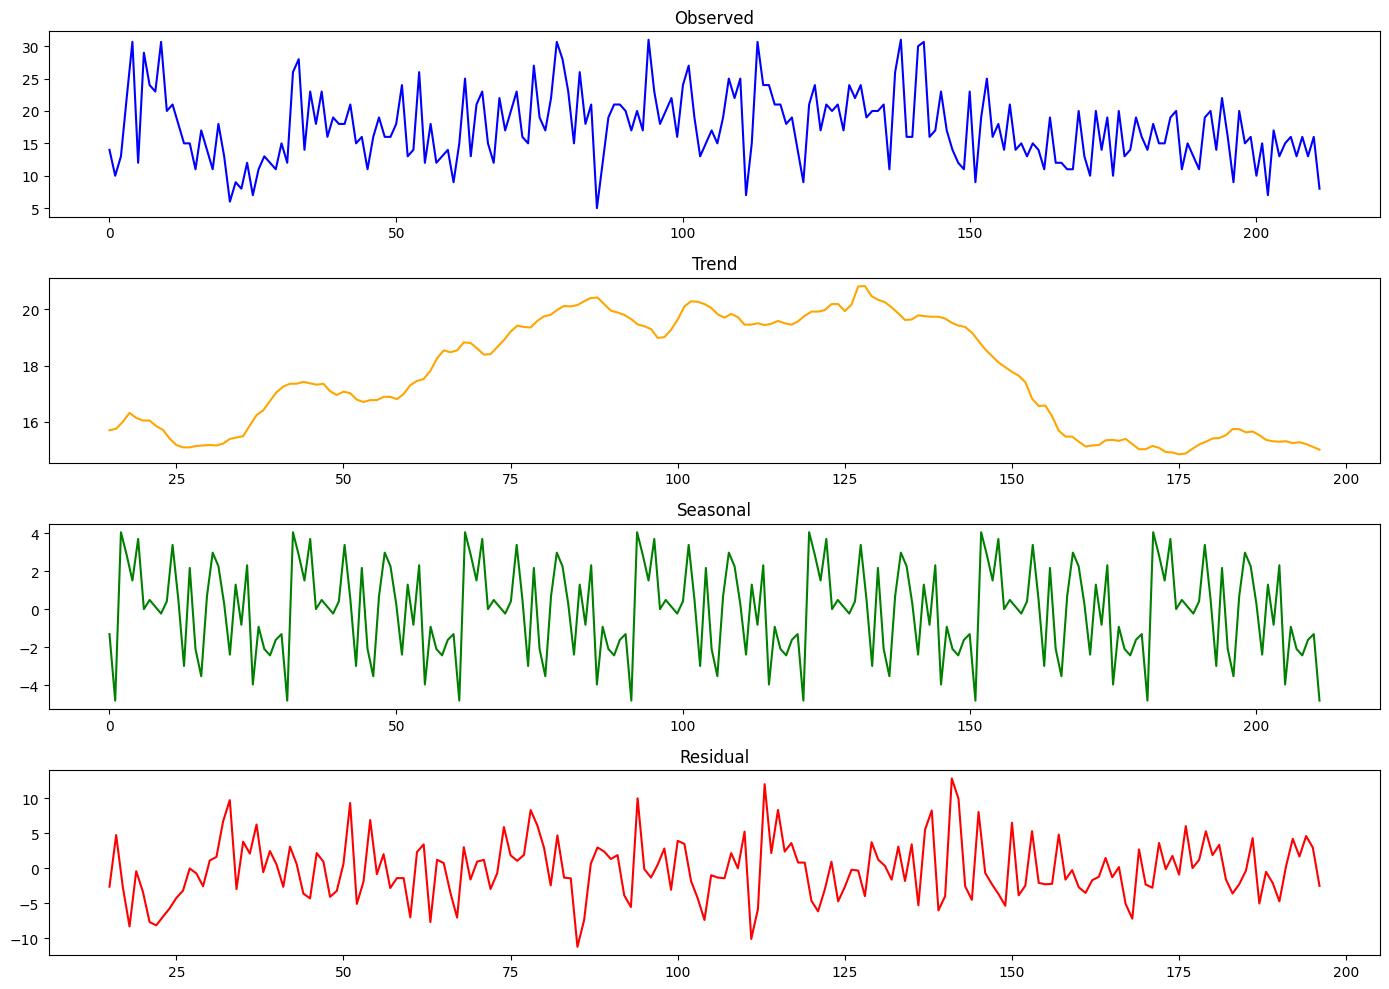

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_excel('/content/Final_file.xlsx')
# ... (rest of your code)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Select the time series column
series = data['imputed_Quantity']

# Decompose the time series
decomposition = seasonal_decompose(series, model='additive', period=30)  # Adjust period if necessary

# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')

plt.tight_layout()
plt.show()


##Step 2: Train-Test Split
Split the dataset into training (80%) and testing (20%) sets based on the time index to ensure no data leakage.

In [9]:
# Split the dataset into training and testing sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Display the time range of the training and testing sets
print("Training Data:", train.index.min(), "to", train.index.max())
print("Testing Data:", test.index.min(), "to", test.index.max())


Training Data: 0 to 168
Testing Data: 169 to 211


##Step 3: Plot ACF and PACF
Use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to identify ARIMA parameters:

𝑝: Order of autoregression.

𝑑: Degree of differencing (manually decide this based on trends).

𝑞: Order of moving average.

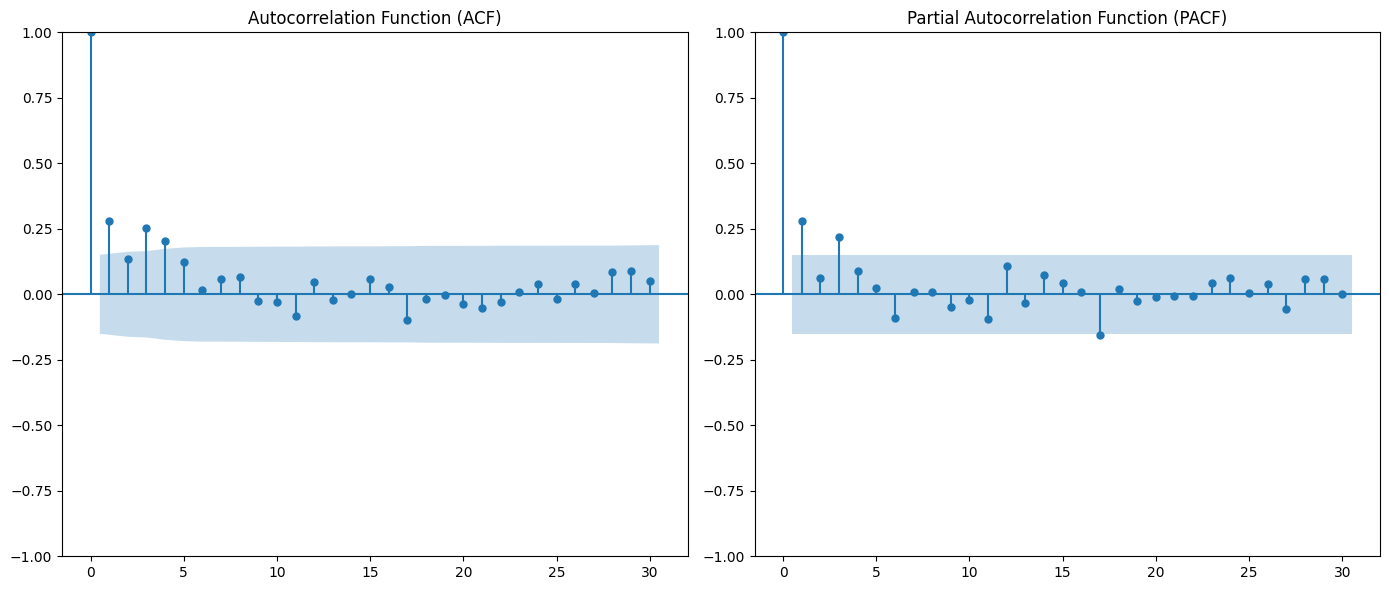

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF (to identify q)
plt.subplot(121)
plot_acf(train, lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

# PACF (to identify p)
plt.subplot(122)
plot_pacf(train, lags=30, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


##Step 4: Fit the ARIMA Model
Use the parameters (
𝑝
,
𝑑
,
𝑞
) identified from ACF and PACF plots to fit an ARIMA model. Adjust these values based on observations.

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (example: p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))

# Fit the model
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:       imputed_Quantity   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -524.544
Date:                Tue, 19 Nov 2024   AIC                           1055.088
Time:                        20:15:23   BIC                           1064.460
Sample:                             0   HQIC                          1058.891
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1819      0.082      2.229      0.026       0.022       0.342
ma.L1         -0.9057      0.047    -19.471      0.000      -0.997      -0.815
sigma2        29.9162      3.320      9.010      0.0

##Step 5: Evaluate the Model
Evaluate the model’s performance on the test dataset using metrics like:

Mean Absolute Error (MAE)
Root Mean Squared Error (RMSE)
Mean Absolute Percentage Error (MAPE)

MAE: 2.941081622818511
RMSE: 3.6679284447826697
MAPE: 21.90%


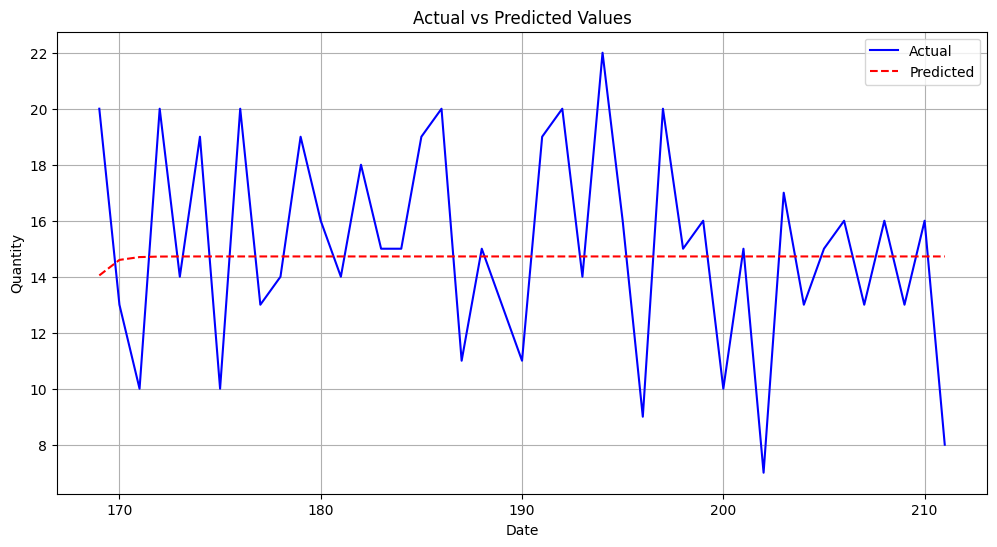

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
predictions = fitted_model.forecast(steps=len(test))

# Evaluate metrics
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()


##Step 6: Residual Analysis
Check the residuals of the model to ensure no systematic patterns remain.

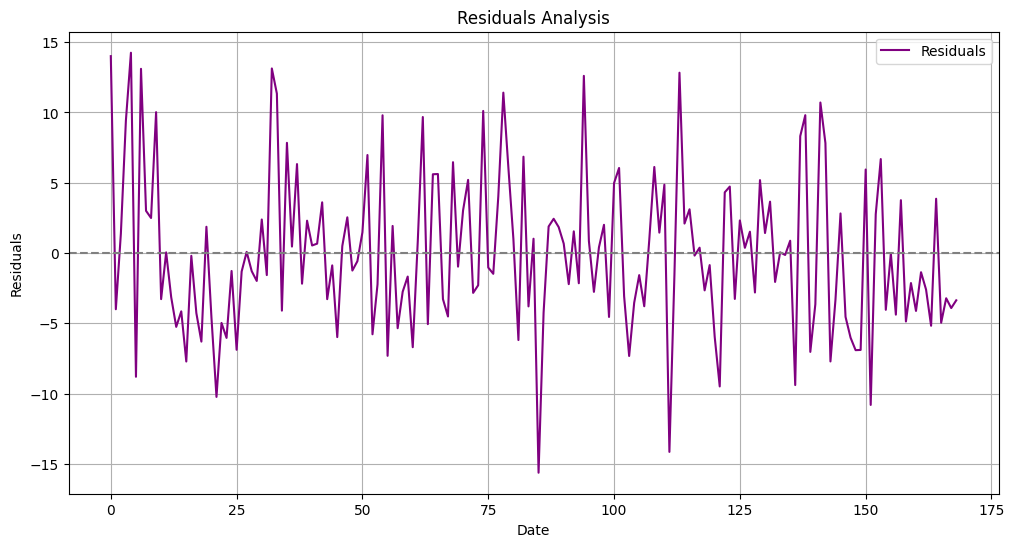

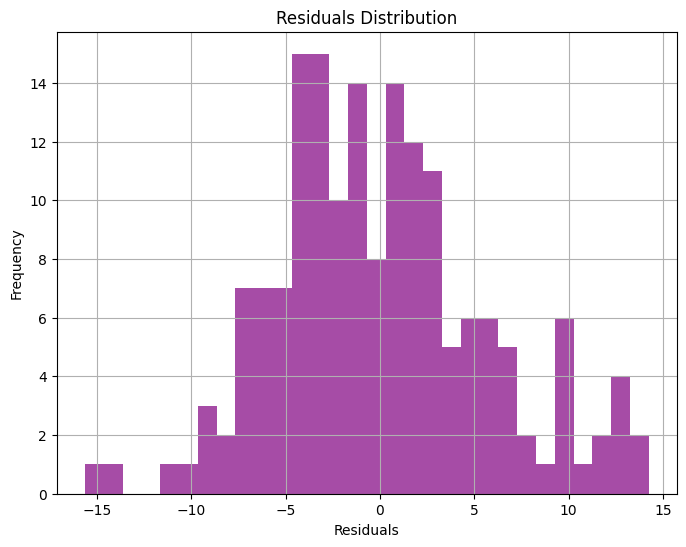

In [13]:
# Plot residuals
residuals = fitted_model.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


##Step 7: Save the Results
Save the model and predictions for further analysis.

In [14]:
# Save predictions to a CSV file
predictions_df = test.copy()
predictions_df = predictions_df.to_frame(name="Actual")
predictions_df["Predicted"] = predictions
predictions_df.to_csv("predictions.csv")

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv
